<a href="https://colab.research.google.com/github/TNK443/RecPadroes/blob/main/02_Classificacao_Tarefa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Resolvendo um Problema de Classificação**

1) Carregue uma base de dados de classificação (binária ou multiclasse, mas não multirrótulo) que NÃO esteja nos toy datasets do scikit-learn;

2) Treine um modelo da classe LogisticRegression do scikit-learn com toda a base;

3) Calcule o MSE (erro quadrático médio) para todos os exemplos da usada como treino no modelo treinado;

4) Plote 3 gráficos (2D) o MSE em função do atributo intercept_ da classe LogisticRegression. Mantenha os valores do atributo coef_ fixos e varie o valor de intercept_ entre intercept_ - delta e intercept_ + delta.

> 4.1) Diferentemente da tarefa de regressão, o gráfico do erro da classificação, muito provavelmente, não terá a aparência "bem comportada" que o gráfico do erro da regressão teve. Por isso, você precisará encontrar 3 deltas (um para cada gráfico). Cada delta provavelmente apresentará uma impressão diferente do comportamento da função de erro.
> 
> 4.2) O atributo intercept_ da classe LogisticRegression é um array que guarda o valor de interceptação de cada classe do problema da base de dados. Portanto, será necessário fazer 3 gráficos para cada valor do intercept_. Exemplo: problema com 3 classes, 9 gráficos.






In [1]:
# ================================================================================
#                               BIBLIOTECAS
# ================================================================================
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import clear_output
# ================================================================================

## 1) Carregue uma base de dados de classificação (binária ou multiclasse, mas não multirrótulo) que NÃO esteja nos toy datasets do scikit-learn;

In [2]:
# ================================================================================
#                                 CODIGO I
# ================================================================================
# CARREGANDO A BASE ESCOLHIDA
# Load the covertype dataset (classification).
from sklearn.datasets import fetch_covtype
clear_output()

covtype = fetch_covtype()

print('=' * 100)

print('-' * 80)
print("[SKLEARN.DATASETS.FETCH_COVTYPE]")
print("Load the covertype dataset (classification).")
print()
print(covtype.keys())
print()
print('-' * 80)

print('=' * 100)
# ================================================================================

--------------------------------------------------------------------------------
[SKLEARN.DATASETS.FETCH_COVTYPE]
Load the covertype dataset (classification).

dict_keys(['data', 'target', 'DESCR'])

--------------------------------------------------------------------------------


X.shape: (581012, 54)  ||  y.shape (581012,)  ||  set(y) {1, 2, 3, 4, 5, 6, 7}
----------------------------------------------------------------------------------------------------

CARACTERISTICA(DIMENSAO):  0



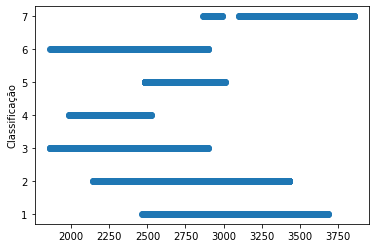


CARACTERISTICA(DIMENSAO):  1



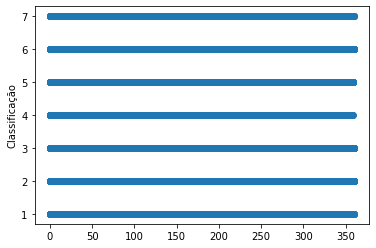


CARACTERISTICA(DIMENSAO):  2



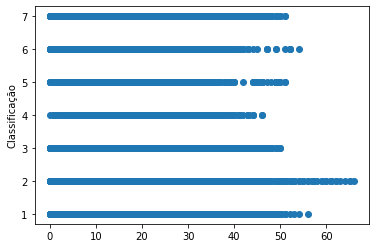


CARACTERISTICA(DIMENSAO):  3



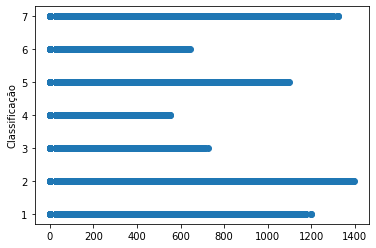


CARACTERISTICA(DIMENSAO):  4



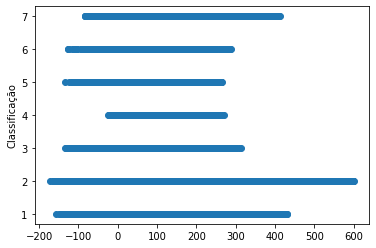


CARACTERISTICA(DIMENSAO):  5



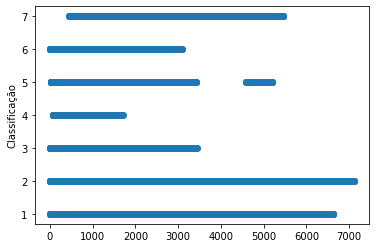


CARACTERISTICA(DIMENSAO):  6



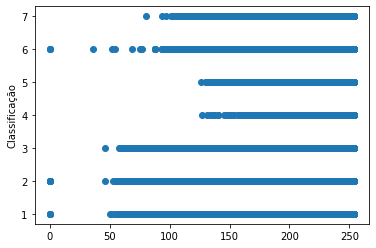


CARACTERISTICA(DIMENSAO):  7



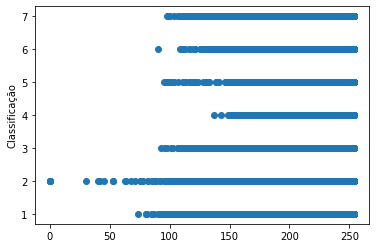


CARACTERISTICA(DIMENSAO):  8



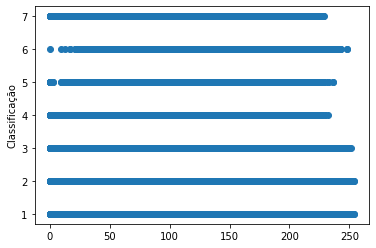


CARACTERISTICA(DIMENSAO):  9



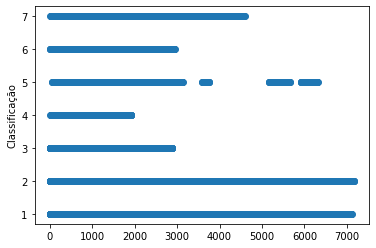

----------------------------------------------------------------------------------------------------


In [3]:
# ================================================================================
#                                 CODIGO II
# ================================================================================
# DEMONSTRANDO O CONTEUDO E DIMENSOES DA BASE
# --------------------------------------------------------------------------------
X, y = covtype.data, covtype.target
print("X.shape:" ,X.shape, " || ", "y.shape", y.shape, " || ", "set(y)", set(y))
# --------------------------------------------------------------------------------
print('-' * 100)
# --------------------------------------------------------------------------------
# for i in range(X.shape[1]):
for i in range(10):
    print()
    print("CARACTERISTICA(DIMENSAO): ", i)
    print()
    plt.ylabel("Classificação")
    plt.scatter(X[:,i], y)
    plt.show()
# --------------------------------------------------------------------------------
print('-' * 100)
# ================================================================================

## 2) Treine um modelo da classe LogisticRegression do scikit-learn com toda a base;

In [4]:
# ================================================================================
#                          CODIGO III - LogisticRegression()
# ================================================================================
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(X, y)
ypred = modelo.predict(X)

print('-' * 100)
print("RESULTADO POS TREINAMENTO DA BASE [SKLEARN.DATASETS.FETCH_COVTYPE] COM O LOGISTICREGRESSION()")
print()
print("Intercept(w0 / b) =", modelo.intercept_)
print()
print("Coef(w1 / a) =", modelo.coef_)
print()
print('-' * 100)
# ================================================================================

----------------------------------------------------------------------------------------------------
RESULTADO POS TREINAMENTO DA BASE [SKLEARN.DATASETS.FETCH_COVTYPE] COM O LOGISTICREGRESSION()

Intercept(w0 / b) = [-1.22793330e-04  4.37948257e-05  7.84271620e-05  8.35599106e-06
  1.76330671e-06  3.74986268e-05 -4.70465825e-05]

Coef(w1 / a) = [[ 4.17604006e-03 -7.43607679e-04 -5.77384206e-03  9.07976556e-04
  -9.35120483e-03  4.28843967e-04 -2.55476898e-02 -2.05933125e-02
  -7.22875072e-03  2.40922101e-04  5.44873024e-05  9.67109296e-05
  -1.53306027e-04 -1.20685534e-04 -8.66893046e-06 -2.63073606e-05
  -1.63681473e-05 -4.62639080e-05 -4.59927808e-06 -2.07838368e-05
  -4.88414334e-07 -1.47423210e-07 -1.72123605e-06 -1.26240821e-04
  -4.48154994e-05 -9.09637060e-05 -6.18433012e-05 -1.80240658e-06
  -8.48520521e-09 -2.87418882e-06 -1.08069967e-05 -4.86637202e-06
   1.21412802e-05  9.93598993e-06  7.73243606e-06  1.78504266e-04
   1.96181966e-04  2.85677246e-05 -1.00374159e-06 -8.595481

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 3) Calcule o MSE (erro quadrático médio) para todos os exemplos da usada como treino no modelo treinado;

In [5]:
# ================================================================================
#                                 CODIGO IV
# ================================================================================
from sklearn.metrics import mean_squared_error

print('-' * 100)
print()
print("MSE (Erro Quadrático Médio) da BASE [SKLEARN.DATASETS.FETCH_COVTYPE]")
print()
print("MSE =", mean_squared_error(y, ypred))
print()
print('-' * 100)
# ================================================================================

----------------------------------------------------------------------------------------------------

MSE (Erro Quadrático Médio) da BASE [SKLEARN.DATASETS.FETCH_COVTYPE]

MSE = 2.211093746772872

----------------------------------------------------------------------------------------------------


## 4) Plote 3 gráficos (2D) o MSE em função do atributo intercept_ da classe LogisticRegression. Mantenha os valores do atributo coef_ fixos e varie o valor de intercept_ entre intercept_ - delta e intercept_ + delta.

### 4.1) Diferentemente da tarefa de regressão, o gráfico do erro da classificação, muito provavelmente, não terá a aparência "bem comportada" que o gráfico do erro da regressão teve. Por isso, você precisará encontrar 3 deltas (um para cada gráfico). Cada delta provavelmente apresentará uma impressão diferente do comportamento da função de erro.

### 4.2) O atributo intercept_ da classe LogisticRegression é um array que guarda o valor de interceptação de cada classe do problema da base de dados. Portanto, será necessário fazer 3 gráficos para cada valor do intercept_. Exemplo: problema com 3 classes, 9 gráficos.

####################################################################################################

                                             INTERCEPT[1]
           --------------------------------------------------------------------------------
                                               DELTA 01



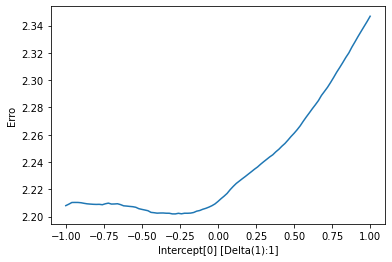


           --------------------------------------------------------------------------------
                                               DELTA 02



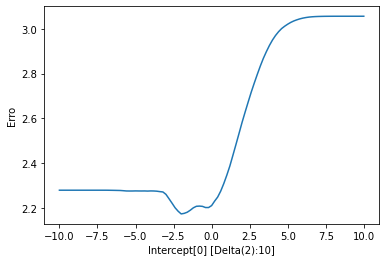


           --------------------------------------------------------------------------------
                                               DELTA 03



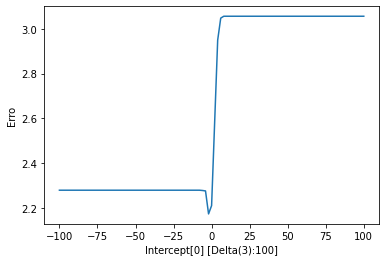


           --------------------------------------------------------------------------------

                                             INTERCEPT[2]
           --------------------------------------------------------------------------------
                                               DELTA 01



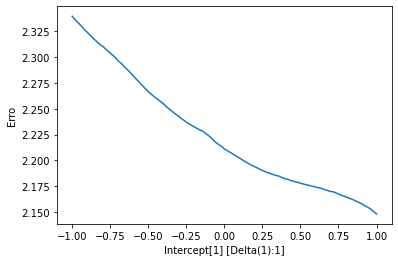


           --------------------------------------------------------------------------------
                                               DELTA 02



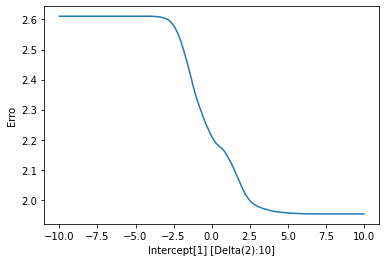


           --------------------------------------------------------------------------------
                                               DELTA 03



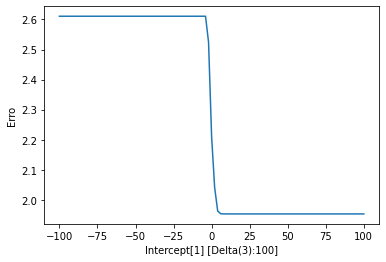


           --------------------------------------------------------------------------------

                                             INTERCEPT[3]
           --------------------------------------------------------------------------------
                                               DELTA 01



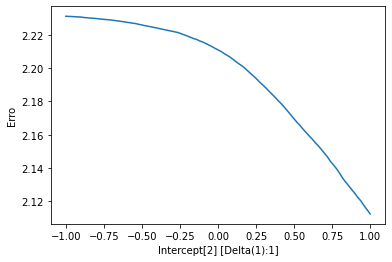


           --------------------------------------------------------------------------------
                                               DELTA 02



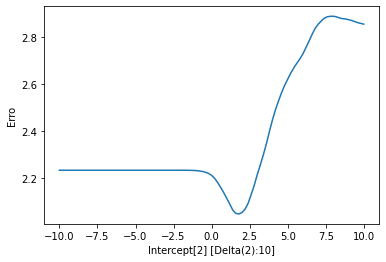


           --------------------------------------------------------------------------------
                                               DELTA 03



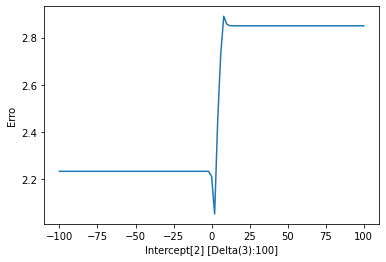


           --------------------------------------------------------------------------------

                                             INTERCEPT[4]
           --------------------------------------------------------------------------------
                                               DELTA 01



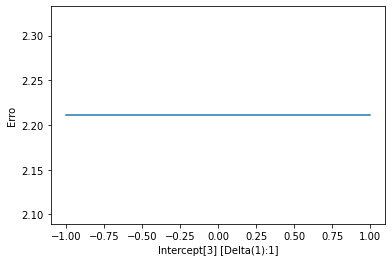


           --------------------------------------------------------------------------------
                                               DELTA 02



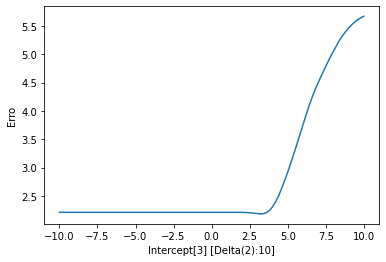


           --------------------------------------------------------------------------------
                                               DELTA 03



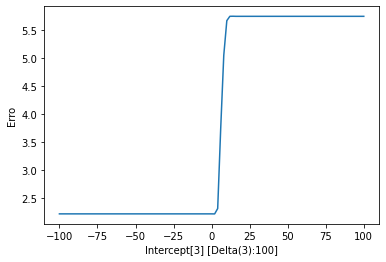


           --------------------------------------------------------------------------------

                                             INTERCEPT[5]
           --------------------------------------------------------------------------------
                                               DELTA 01



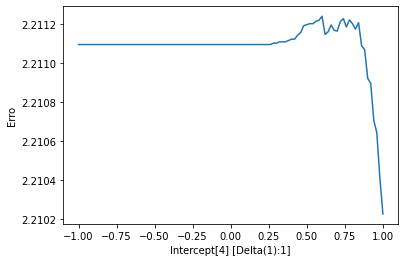


           --------------------------------------------------------------------------------
                                               DELTA 02



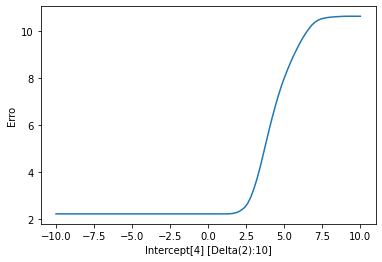


           --------------------------------------------------------------------------------
                                               DELTA 03



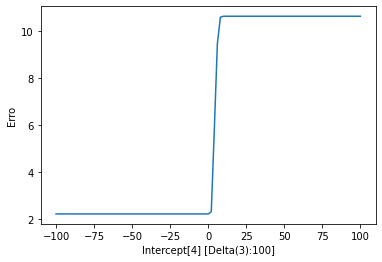


           --------------------------------------------------------------------------------

                                             INTERCEPT[6]
           --------------------------------------------------------------------------------
                                               DELTA 01



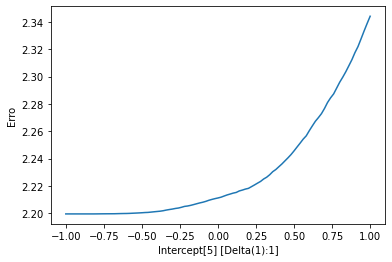


           --------------------------------------------------------------------------------
                                               DELTA 02



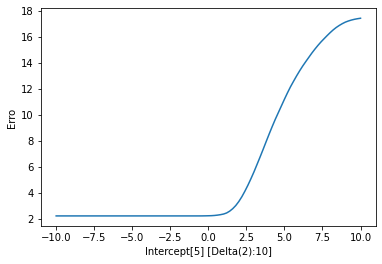


           --------------------------------------------------------------------------------
                                               DELTA 03



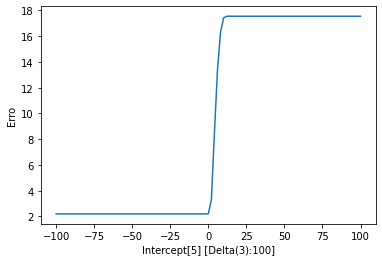


           --------------------------------------------------------------------------------

                                             INTERCEPT[7]
           --------------------------------------------------------------------------------
                                               DELTA 01



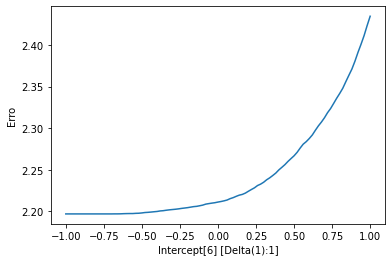


           --------------------------------------------------------------------------------
                                               DELTA 02



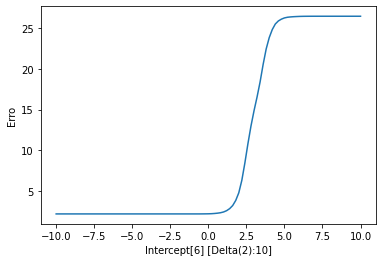


           --------------------------------------------------------------------------------
                                               DELTA 03



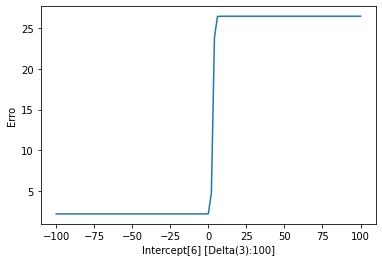


           --------------------------------------------------------------------------------

####################################################################################################



In [6]:
# ================================================================================
#                                 CODIGO V
# ================================================================================
# --------------------------------------------------------------------------------
delta1 = [  1,   1,   1,   1,   1,   1,   1]
delta2 = [ 10,  10,  10,  10,  10,  10,  10]
delta3 = [100, 100, 100, 100, 100, 100, 100]

def plot(i):
    name = 'INTERCEPT[' + str(i+1) + ']'
    print('=' * 100)
    print(' '*(round((100-len(name))/2)),name)
    print('=' * 100)
    
    # ---------- DELTA01 ----------
    name = 'DELTA 01'
    print(' '*10, '-'*80)
    print(' '*(round((100-len(name))/2)),name)
    print()

    erros = []
    intercept = modelo.intercept_[i]
    ws1 = np.linspace( (intercept - delta1[i]), (intercept + delta1[i]), 101)
    for w in ws1:
        modelo.intercept_[i] = w
        ypred = modelo.predict(X)
        erro = mean_squared_error(y, ypred)
        erros.append(erro)
    modelo.intercept_[i] = intercept

    plt.ylabel("Erro")
    plt.xlabel(f"Intercept[{i}] [Delta(1):{delta1[i]}]")
    plt.plot(ws1,erros)
    plt.show()


    # ---------- DELTA02 ----------
    name = 'DELTA 02'
    print()
    print(' '*10, '-'*80)
    print(' '*(round((100-len(name))/2)),name)
    print()

    erros = []
    intercept = modelo.intercept_[i]
    ws2 = np.linspace( (intercept - delta2[i]), (intercept + delta2[i]), 101)
    for w in ws2:
        modelo.intercept_[i] = w
        ypred = modelo.predict(X)
        erro = mean_squared_error(y, ypred)
        erros.append(erro)
    modelo.intercept_[i] = intercept
    plt.ylabel("Erro")
    plt.xlabel(f"Intercept[{i}] [Delta(2):{delta2[i]}]")
    plt.plot(ws2,erros)
    plt.show()


    # ---------- DELTA03 ----------
    name = 'DELTA 03'
    print()
    print(' '*10, '-'*80)
    print(' '*(round((100-len(name))/2)),name)
    print()

    erros = []
    intercept = modelo.intercept_[i]
    ws3 = np.linspace( (intercept - delta3[i]), (intercept + delta3[i]), 101)
    for w in ws3:
        modelo.intercept_[i] = w
        ypred = modelo.predict(X)
        erro = mean_squared_error(y, ypred)
        erros.append(erro)
    modelo.intercept_[i] = intercept
    plt.ylabel("Erro")
    plt.xlabel(f"Intercept[{i}] [Delta(3):{delta3[i]}]")
    plt.plot(ws3,erros)
    plt.show()

    print()
    print(' '*10, '-'*80)
    print()


print('#' * 100)
print()

for i in range(len(modelo.intercept_)):
    plot(i)

print('#' * 100)
print()
# --------------------------------------------------------------------------------
# ================================================================================

Outros còdigo, para ajuda na validação.

In [7]:
# aux = 100
# i=0

# erros = []
# intercept = modelo.intercept_[i]
# ws = np.linspace( (intercept - aux), (intercept + aux), 101)
# for w in ws:
#     modelo.intercept_[i] = w
#     ypred = modelo.predict(X)
#     erro = mean_squared_error(y, ypred)
#     erros.append(erro)
# modelo.intercept_[i] = intercept
# plt.ylabel("Erro")
# plt.xlabel(f"W[{i}]")
# plt.plot(ws,erros)
# plt.show()

In [8]:
# delta1 = [  1,   1,   1,   1,   1,   1,   1]
# delta2 = [ 10,  10,  10,  10,  10,  10,  10]
# delta3 = [100, 100, 100, 100, 100, 100, 100]

# i=0

# erros = []
# intercept = modelo.intercept_[i]
# ws = np.linspace( (intercept - delta[i]), (intercept + delta[i]), 101)
# for w in ws:
#     modelo.intercept_[i] = w
#     ypred = modelo.predict(X)
#     erro = mean_squared_error(y, ypred)
#     erros.append(erro)
# modelo.intercept_[i] = intercept


# plt.ylabel("Erro")
# plt.xlabel(f"W[{i}]")
# plt.plot(ws,erros)
# plt.show()


# erros = []
# intercept = modelo.intercept_[i]
# ws2 = np.linspace( (intercept - delta2[i]), (intercept + delta2[i]), 101)
# for w in ws2:
#     modelo.intercept_[i] = w
#     ypred = modelo.predict(X)
#     erro = mean_squared_error(y, ypred)
#     erros.append(erro)
# modelo.intercept_[i] = intercept
# plt.ylabel("Erro")
# plt.xlabel(f"W[{i}]")
# plt.plot(ws2,erros)
# plt.show()


# erros = []
# intercept = modelo.intercept_[i]
# ws3 = np.linspace( (intercept - delta3[i]), (intercept + delta3[i]), 101)
# for w in ws3:
#     modelo.intercept_[i] = w
#     ypred = modelo.predict(X)
#     erro = mean_squared_error(y, ypred)
#     erros.append(erro)
# modelo.intercept_[i] = intercept
# plt.ylabel("Erro")
# plt.xlabel(f"W[{i}]")
# plt.plot(ws3,erros)
# plt.show()